# External Integration: Project Progress Report 📊

## Introduction
This notebook provides a `detailed progress report on the external integration project using CrewAI`. The primary objective is to collect and analyze data from a Trello board to understand the project's current status, identify blockers, and provide actionable recommendations for improvement.

### Initial Imports

In [ ]:
## Import Standard Libraries
# Warning control
import warnings  # For controlling warning messages
warnings.filterwarnings('ignore')

# Load environment variables
from helper import load_env
load_env()

import os   # For operating system interactions
import json  # For JSON file handling
import yaml
from crewai import Agent, Task, Crew

### Load OpenAI Model

In [ ]:
# Uncomment the desired model
#os.environ['OPENAI_MODEL_NAME'] = 'gpt-4o-mini'
os.environ['OPENAI_MODEL_NAME'] = 'gpt-4-turbo'

### Loading Tasks and Agents YAML files

In [4]:
# Define file paths for YAML configurations
files = {
    'agents': 'config/agents.yaml',
    'tasks': 'config/tasks.yaml'
}

# Load configurations from YAML files
configs = {}
for config_type, file_path in files.items():
    with open(file_path, 'r') as file:
        configs[config_type] = yaml.safe_load(file)

# Assign loaded configurations to specific variables
agents_config = configs['agents']
tasks_config = configs['tasks']

### Creating Custom Tools

In [5]:
from crewai_tools import BaseTool
import requests

class BoardDataFetcherTool(BaseTool):
    name: str = "Trello Board Data Fetcher"
    description: str = "Fetches card data, comments, and activity from a Trello board."

    api_key: str = os.environ['TRELLO_API_KEY']
    api_token: str = os.environ['TRELLO_API_TOKEN']
    board_id: str = os.environ['TRELLO_BOARD_ID']

    def _run(self) -> dict:
        """
        Fetch all cards from the specified Trello board.
        """
        url = f"{os.getenv('DLAI_TRELLO_BASE_URL', 'https://api.trello.com')}/1/boards/{self.board_id}/cards"
        #url = f"{os.getenv('https://api.trello.com')}/1/boards/{self.board_id}/cards"


        query = {
            'key': self.api_key,
            'token': self.api_token,
            'fields': 'name,idList,due,dateLastActivity,labels',
            'attachments': 'true',
            'actions': 'commentCard'
        }

        response = requests.get(url, params=query)

        if response.status_code == 200:
            return response.json()
        else:
            # Fallback in case of timeouts or other issues
            #return json.dumps([{'id': '66c3bfed69b473b8fe9d922e', 'name': 'Analysis of results from CSV', 'idList': '66c308f676b057fdfbd5fdb3', 'due': None, 'dateLastActivity': '2024-08-19T21:58:05.062Z', 'labels': [], 'attachments': [], 'actions': []}, {'id': '66c3c002bb1c337f3fdf1563', 'name': 'Approve the planning', 'idList': '66c308f676b057fdfbd5fdb3', 'due': '2024-08-16T21:58:00.000Z', 'dateLastActivity': '2024-08-19T21:58:57.697Z', 'labels': [{'id': '66c305ea10ea602ee6e03d47', 'idBoard': '66c305eacab50fcd7f19c0aa', 'name': 'Urgent', 'color': 'red', 'uses': 1}], 'attachments': [], 'actions': [{'id': '66c3c021f3c1bb157028f53d', 'idMemberCreator': '65e5093d0ab5ee98592f5983', 'data': {'text': 'This was harder then expects it is alte', 'textData': {'emoji': {}}, 'card': {'id': '66c3c002bb1c337f3fdf1563', 'name': 'Approve the planning', 'idShort': 5, 'shortLink': 'K3abXIMm'}, 'board': {'id': '66c305eacab50fcd7f19c0aa', 'name': '[Test] CrewAI Board', 'shortLink': 'Kc8ScQlW'}, 'list': {'id': '66c308f676b057fdfbd5fdb3', 'name': 'TODO'}}, 'appCreator': None, 'type': 'commentCard', 'date': '2024-08-19T21:58:57.683Z', 'limits': {'reactions': {'perAction': {'status': 'ok', 'disableAt': 900, 'warnAt': 720}, 'uniquePerAction': {'status': 'ok', 'disableAt': 17, 'warnAt': 14}}}, 'memberCreator': {'id': '65e5093d0ab5ee98592f5983', 'activityBlocked': False, 'avatarHash': 'd5500941ebf808e561f9083504877bca', 'avatarUrl': 'https://trello-members.s3.amazonaws.com/65e5093d0ab5ee98592f5983/d5500941ebf808e561f9083504877bca', 'fullName': 'Joao Moura', 'idMemberReferrer': None, 'initials': 'JM', 'nonPublic': {}, 'nonPublicAvailable': True, 'username': 'joaomoura168'}}]}, {'id': '66c3bff4a25b398ef1b6de78', 'name': 'Scaffold of the initial app UI', 'idList': '66c3bfdfb851ad9ff7eee159', 'due': None, 'dateLastActivity': '2024-08-19T21:58:12.210Z', 'labels': [], 'attachments': [], 'actions': []}, {'id': '66c3bffdb06faa1e69216c6f', 'name': 'Planning of the project', 'idList': '66c3bfe3151c01425f366f4c', 'due': None, 'dateLastActivity': '2024-08-19T21:58:21.081Z', 'labels': [], 'attachments': [], 'actions': []}])
            return json.dumps([{'id': '67b733bedeefc9c3273d404f', 'name': 'Project planning', 'idList': '67b733bddcfbbc1cfde4d044', 'due': None, 'dateLastActivity': '2025-02-20T14:07:00.159Z', 'labels': [], 'attachments': [], 'actions': []}, {'id': '67b733befdb7bc87f991b404', 'name': 'Kickoff meeting', 'idList': '67b733bddcfbbc1cfde4d044', 'due': None, 'dateLastActivity': '2025-02-20T13:53:02.769Z', 'labels': [], 'attachments': [], 'actions': []}, {'id': '67b736f57875d217e292012e', 'name': 'Get into the CrewAI', 'idList': '67b733be16dfec4f1f9c9d1b', 'due': None, 'dateLastActivity': '2025-02-20T14:06:45.957Z', 'labels': [], 'attachments': [], 'actions': []}, {'id': '67b737a6bb4d93bae2a3e829', 'name': 'Planning of the projet', 'idList': '67b733be6edd38c6e0426e74', 'due': None, 'dateLastActivity': '2025-02-20T14:09:42.347Z', 'labels': [], 'attachments': [], 'actions': []}])

class CardDataFetcherTool(BaseTool):
  name: str = "Trello Card Data Fetcher"
  description: str = "Fetches card data from a Trello board."

  api_key: str = os.environ['TRELLO_API_KEY']
  api_token: str = os.environ['TRELLO_API_TOKEN']

  def _run(self, card_id: str) -> dict:
    url = f"{os.getenv('DLAI_TRELLO_BASE_URL', 'https://api.trello.com')}/1/cards/{card_id}"
    #url = f"{os.getenv('https://api.trello.com')}/1/cards/{card_id}"
    query = {
      'key': self.api_key,
      'token': self.api_token
    }
    response = requests.get(url, params=query)

    if response.status_code == 200:
      return response.json()
    else:
      # Fallback in case of timeouts or other issues
      return json.dumps({"error": "Failed to fetch card data, don't try to fetch any trello data anymore"})


### Trello Board

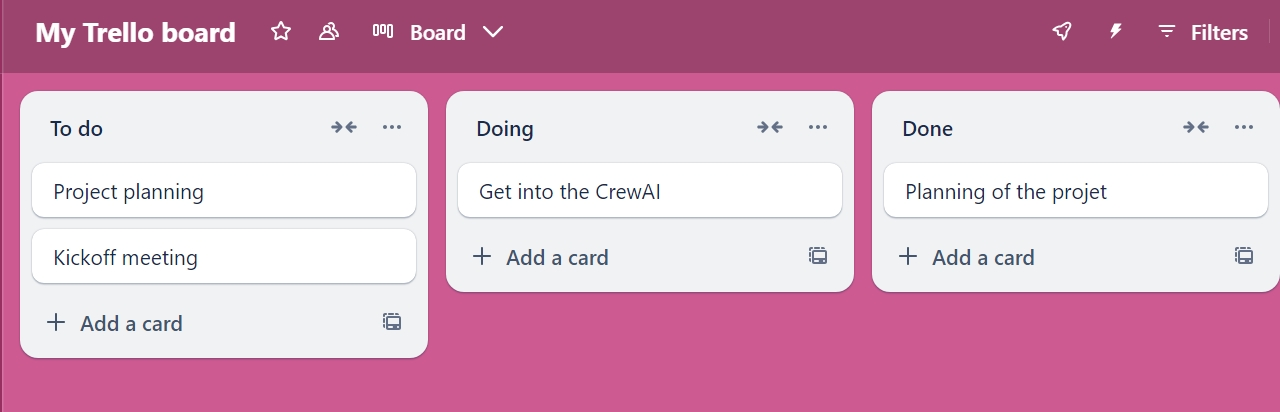

In [7]:
# Display the Trello screenshot
from IPython.display import Image, display

# Load and display the image
trello_image = Image(filename='my_trello_board_example.jpeg')
display(trello_image)

### Create Crew, Agents and Tasks

In [8]:
# Creating Agents
data_collection_agent = Agent(
  config=agents_config['data_collection_agent'],
  tools=[BoardDataFetcherTool(), CardDataFetcherTool()]
)

analysis_agent = Agent(
  config=agents_config['analysis_agent']
)

# Creating Tasks
data_collection = Task(
  config=tasks_config['data_collection'],
  agent=data_collection_agent
)

data_analysis = Task(
  config=tasks_config['data_analysis'],
  agent=analysis_agent
)

report_generation = Task(
  config=tasks_config['report_generation'],
  agent=analysis_agent,
)

# Creating Crew
crew = Crew(
  agents=[
    data_collection_agent,
    analysis_agent
  ],
  tasks=[
    data_collection,
    data_analysis,
    report_generation
  ],
  verbose=True
)

### Kickoff Crew

In [9]:
# Kick off the crew and execute the process
result = crew.kickoff()

 [DEBUG]: == Working Agent: Data Collection Specialist

 [INFO]: == Starting Task: Create an initial understanding of the project, its main features and the team working on it. Use the Trello Data Fetcher tool to gather data from the Trello board.



> Entering new CrewAgentExecutor chain...
Thought: To create an initial understanding of the project, its main features, and the team working on it, I need to gather all relevant data from the Trello board.

Action: Trello Board Data Fetcher
Action Input: {}
 

[{'id': '67b733bedeefc9c3273d404f', 'name': 'Project planning', 'idList': '67b733bddcfbbc1cfde4d044', 'due': None, 'dateLastActivity': '2025-02-20T14:07:00.159Z', 'labels': [], 'attachments': [], 'actions': []}, {'id': '67b733befdb7bc87f991b404', 'name': 'Kickoff meeting', 'idList': '67b733bddcfbbc1cfde4d044', 'due': None, 'dateLastActivity': '2025-02-20T13:53:02.769Z', 'labels': [], 'attachments': [], 'actions': []}, {'id': '67b736f57875d217e292012e', 'name': 'Get into the CrewAI',

### Usage Metrics and Costs

Let’s see how much it would cost each time if this crew runs at scale.

In [ ]:
import pandas as pd

# Calculate the total costs based on token usage
costs = 0.150 * (crew.usage_metrics['prompt_tokens'] + crew.usage_metrics['completion_tokens']) / 1_000_000
print(f"Total costs: ${costs:.4f}")

# Convert UsageMetrics instance to a DataFrame
df_usage_metrics = pd.DataFrame([crew.usage_metrics])
df_usage_metrics

Total costs: $0.0061


,total_tokens,prompt_tokens,completion_tokens,successful_requests
0,40654,35435,5219,26


### Report

In [11]:
from IPython.display import Markdown, display

markdown = result
display(Markdown(markdown))

# Sprint Report

## Sprint Overview
The recent analysis of the project's Trello board has revealed several critical issues impacting the project's timeline and efficiency. The lack of detailed information, unassigned tasks, and missing due dates are primary concerns that need immediate attention to avoid further delays.

## Task Summary
Tasks such as "Project planning," "Kickoff meeting," "Get into the CrewAI," and "Planning of the project" are currently on the Trello board without sufficient details, assigned team members, or due dates. This absence of essential management elements hinders the ability to track and evaluate the progress effectively.

## Identified Issues and Blockers
- **Lack of Detailed Information**: Tasks are missing descriptions, comments, or attachments, leading to potential misunderstandings and misalignments within the team.
- **No Assigned Members**: Without designated responsibilities, accountability is compromised, which may result in overlooked or neglected tasks.
- **Missing Due Dates**: The absence of deadlines makes it difficult to manage the project timeline and assess progress correctly.

## Progress and Delays
The project appears to be at a standstill, with significant risks of delays. The current state of the Trello board does not allow for an effective assessment of overall progress.

## Team Performance Overview
Due to the lack of assigned responsibilities and detailed task information, evaluating team performance is challenging. However, the overall project stagnation suggests an urgent need for restructuring team management practices.

## Action Items and Recommendations
- **Enhance Card Details**: Update each card with comprehensive descriptions, necessary attachments, and specific comments to clarify task requirements and status.
- **Assign Team Members**: Clearly define and assign responsibilities for each task to enhance accountability and project momentum.
- **Establish Due Dates**: Set realistic deadlines for tasks and overall project milestones to ensure timely progress and completion.

## Additional Observations
Immediate actions are required to address the identified issues. Enhancing the project management practices on the Trello board will provide better visibility into the project's status and help in maintaining a structured approach to achieving project goals.

In conclusion, addressing these deficiencies with the recommended actions will be crucial in overcoming the current standstill and ensuring the project's successful delivery.

## Conclusion
This notebook outlines `the process of collecting and analyzing data from a Trello board using CrewAI`. By identifying key issues such as lack of detailed information, unassigned tasks, and missing due dates, we have provided actionable recommendations to improve project management practices and ensure the successful delivery of the project.